In [1]:
import pandas as pd
import pyBigWig 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation

def pwg(cells,path,x,chrs=22,labels=[],color=[],w=.9,ylabel='DNAm',figure='f'): 
    if len(labels)==0: labels=cells
    bs=[]
    for cell in cells:
        print(cell,end=',')
        bw=pyBigWig.open(path+cell+'.bw')
        bsc=[]
        for ch in range(10,20):#1,chrs+1):
            bsc.append(bw.stats('chr'+str(ch),0,-1)[0])
        bs.append(bsc)
    pl=pd.DataFrame(pd.DataFrame(bs).mean(1))
    pl[x]=cells
    fig, ax = plt.subplots(figsize=(w,2));
    ax=sns.barplot(data=pl,x=x,y=0);
    if len(color)>0:
        ax=sns.barplot(data=pl,x=x,y=0,palette=color);        
    ax.set(ylabel=ylabel,title='All CpGs');
    ax.set_xticklabels(labels);
    plt.xticks(rotation=90,fontsize=8); 
    fig.savefig('figures/'+figure+'.png', dpi=600,bbox_inches='tight')
def prc(dft):
    c0=cells[0]
    l=dft.apply(lambda x:x['d']*[x[c0]],axis=1)
    l=[item for sublist in l for item in sublist]
    df=pd.DataFrame(l)
    df.columns=[c0]
    for cell in cells[1:]:
        l=dft.apply(lambda x:x['d']*[x[cell]],axis=1)
        l=[item for sublist in l for item in sublist]
        df[cell]=l
    return df
def pprc(tp,color=[],title='LMR CpGs',r=10**5,w=3,ylabel='DNAm',figure='f'):
    if len(color)>0:
        ax=tp.rolling(r).mean().dropna().plot(figsize=(w,2),color=color)    
    else:
        ax=tp.rolling(r).mean().dropna().plot(figsize=(w,2))    
    ax.get_legend().remove()
    ax.set_xticks([])
    ax.set_xlabel('LMRs ranked by PRC2 binding', fontsize=10)
    ax.set(ylabel=ylabel,title=title);
    ax.get_figure().savefig('figures/'+figure+'.png', dpi=600,bbox_inches='tight')
    
def pprch(tp,n,m,color=None,labels=[],legend_title='years',figure='f',title=''):
    dg=tp.tail(round(10**n)).rolling(round(10**m)).mean().dropna()
    ax=dg.plot(figsize=(1.2,2),color=color)
    if len(labels)==0: 
        labels=tp.columns
        handles, labels = ax.get_legend_handles_labels()    
        ax.legend(handles[::-1], labels[::-1],title=legend_title,loc='center left', bbox_to_anchor=(1, 0.5))    
    else:
        handles, l = ax.get_legend_handles_labels()    
        ax.legend([handles[-1],handles[0]], [labels[-1],labels[0]],title=legend_title,loc='center left', bbox_to_anchor=(1, 0.5))    
    ax.set_xticks([])
    ax.set_xlabel('PRC2 binding', fontsize=10)  
    ax.set_title('High-PRC2 CpGs')    
    ax.get_figure().savefig('figures/'+figure+'.png', dpi=600,bbox_inches='tight')
    return dg

def chs(t,cells,n,ages=[],color=[],figure='f'):
    tt=t.tail(10**n)[['ch']+cells]
    pl=tt.melt('ch')
    pl['chn']=pl['ch'].str[3:].astype(int)
    if len(ages)>0:
        pl['age']=pl['variable']#.astype(int)
    else:
        pl['age']=pl['variable'].astype(int)
    pl=pl.sort_values(['chn','age']).drop('chn',axis=1)
    fig, ax = plt.subplots(figsize=(7,2));
    ax=sns.barplot(data=pl,x='ch',y='value',hue='variable',ci=0);
    if len(color)>0:
        ax=sns.barplot(data=pl,x='ch',y='value',hue='variable',ci=0,palette=color);
    ax.legend_.remove();
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
    ax.set(xlabel = "", ylabel = "DNAm",title='High-PRC2 CpGs');  
    fig.savefig('figures/'+figure+'.png', dpi=600,bbox_inches='tight')


0,18,25,82,86,100,

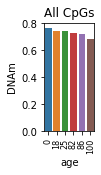

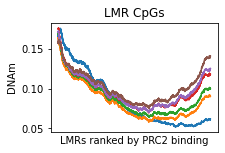

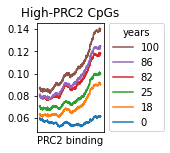

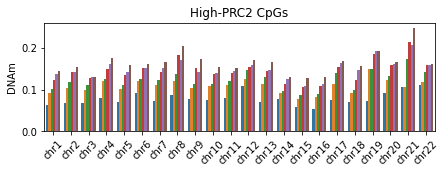

In [2]:
cells=['0','18','25','82','86','100']
path='data/meth/t/'
pwg(cells,path,'age',figure='f1_a_t4_wg');
t=pd.read_csv('results/t.csv')
tp=prc(t)
pprc(tp,figure='f1_a_t4_lmr')
pprch(tp,6,5,figure='f1_a_t4_prc')
chs(t,cells,3,figure='f1_b')

/home/moqri/miniconda3/envs/meth/lib/python3.9/site-packages/numpy/ma/core.py:6849: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
/local/scratch/moqri/slrmtmp.31897868/ipykernel_19761/1686620075.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(pl[pl['up']>=.05][pl['pr']>=1])/len(pl[pl['up']>.05])


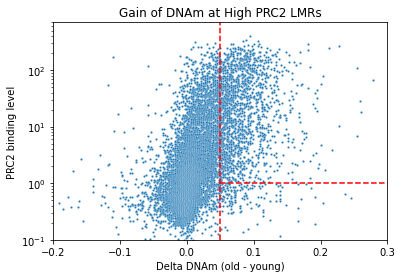

In [25]:
figure='f0_c_t'
t['up']=t['100']-t['0']
tl=t[t['d']>100].copy()
pl=tl[['up','pr']]
ax=sns.scatterplot(data=pl,x='up',y='pr',s=5)
ax.set(yscale="log",xlim=[-.2,.3],ylim=[0.1,700],
       xlabel='Delta DNAm (old - young)',
       ylabel='PRC2 binding level',
      title='Gain of DNAm at High PRC2 LMRs');
plt.axvline(.05, 0,500,color='r',linestyle='--')
plt.axhline(1, .5,1,color='r',linestyle='--')
ax.get_figure().savefig('figures/'+figure+'.png', dpi=600,bbox_inches='tight')
len(pl[pl['up']>=.05][pl['pr']>=1])/len(pl[pl['up']>.05])
ax.get_figure().savefig('figures/'+figure+'.png', dpi=600,bbox_inches='tight')

18,23,25,74,75,83,

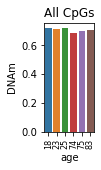

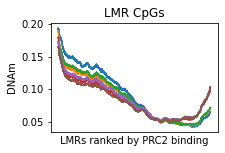

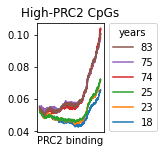

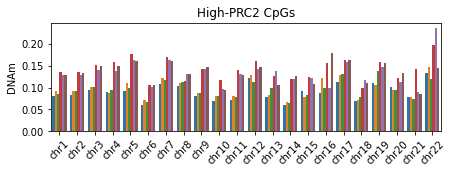

In [3]:
cells=['18','23','25','74','75','83']
path='data/meth/s/'
pl=pwg(cells,path,'age',figure='f1_a_epi_wg')
s=pd.read_csv('results/s.csv')
sp=prc(s)
pprc(sp,figure='f1_a_epi_lmr')
pprch(sp,6,5,figure='f1_a_epi_prc')
ax=chs(s,cells,3)

In [ ]:
cells=['SRR10429'+ i for i in  ['03','06','07','09','11','13']]+['SRR10429'+ i for i in  ['04','05','08','10','12','14']]
ss=pd.read_csv('results/ss.csv',index_col=0)
hz=ss.tail(1000)
p=pd.DataFrame(hz[cells].mean())
p['age']=[25,23,18,75,74,83]+[25,23,18,75,74,83]
p['g']= ['Sun-prot.']*6+['Sun-exp.']*6
p['indivudal']=2*['Young1','Young2','Young3','Old1','Old2','Old3']
p.columns=['Average DNAm','Age','Condition','Individual']
fig, ax = plt.subplots(figsize=(2.5,3))
sns.scatterplot(data=p,x='Age',y='Average DNAm',hue='Condition',hue_order=['Sun-exp.','Sun-prot.'],
                palette=['red','green'],markers=True, style='Individual',s=100,alpha=.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

/home/moqri/miniconda3/envs/meth/lib/python3.9/site-packages/numpy/ma/core.py:6849: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


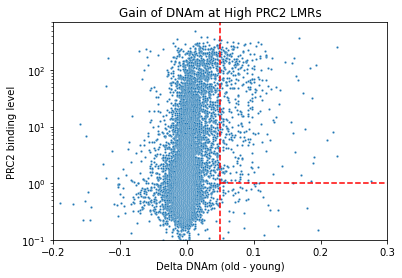

In [23]:
figure='f0_c_epi'
s['up']=s['83']-s['18']
sl=s[s['d']>100].copy()
pl=sl[['up','pr']]
ax=sns.scatterplot(data=pl,x='up',y='pr',s=5)
ax.set(yscale="log",xlim=[-.2,.3],ylim=[0.1,700],
       xlabel='Delta DNAm (old - young)',
       ylabel='PRC2 binding level',
      title='Gain of DNAm at High PRC2 LMRs');
plt.axvline(.05, 0,500,color='r',linestyle='--')
plt.axhline(1, .5,1,color='r',linestyle='--')
ax.get_figure().savefig('figures/'+figure+'.png', dpi=600,bbox_inches='tight')

In [117]:
len(pl[pl['up']>=.05][pl['pr']>=1])/len(pl[pl['up']>.05])

/local/scratch/moqri/slrmtmp.31731641/ipykernel_41148/2284283120.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(pl[pl['up']>=.05][pl['pr']>=1])/len(pl[pl['up']>.05])


0.9122401847575058

SRR4473855,SRR4473856,SRR4473857,SRR4473858,SRR4473859,SRR4473860,SRR4473861,SRR4473862,

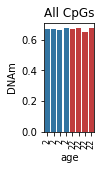

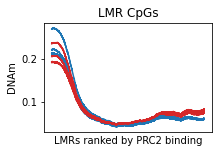

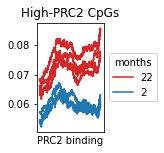

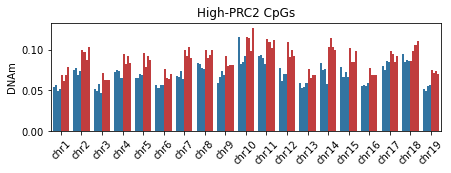

In [55]:
# Mouse Liver
cells=['SRR44738'+str(c) for c in range(55,63)]
path='data/meth/l/'
ages=[2,2,2,2,22,22,22,22]
colors=4*['tab:blue']+4*['tab:red']
pl=pwg(cells,path,'age',chrs=19,labels=ages,color=colors,figure='f1_a_mouse_wg')
l=pd.read_csv('results/l.csv')
lp=prc(l)
pprc(lp,colors,figure='f1_a_mouse_lmr')
pprch(lp,5.6,4.7,labels=ages,legend_title='months',color=4*['tab:blue']+4*['tab:red'],figure='f1_a_mouse_prc')
#chs(l,cells,3,ages=ages,color=4*['tab:blue']+4*['tab:red'])

In [76]:
l['y']=l[cells[0:4]].mean(1)
l['o']=l[cells[4:]].mean(1)
l[['ch','b','e','d','y','o']].tail(5)

,ch,b,e,d,y,o
52278,chr4,152126160,152126300,15,0.27775,0.39500
52279,chr5,26006894,26007620,50,0.14350,0.16700
52280,chr8,84786335,84786757,20,0.13375,0.10825
52281,chr8,84799033,84800801,245,0.00475,0.00850
52282,chr8,84784221,84784971,65,0.29425,0.33875


In [ ]:
l['up']=l[cells[3:]].mean(1)-l[cells[:3]].mean(1)
ll=l[l['d']>100].copy()
pl=ll[['up','pr']]
ax=sns.scatterplot(data=pl,x='up',y='pr',s=5)
ax.set(yscale="log",xlim=[-.05,.05],ylim=[0,1],
       xlabel='Delta DNAm (old - young)',
       ylabel='PRC2 binding level',
      title='Gain of DNAm at High PRC2 LMRs');
plt.axvline(.02, 0,1,color='r',linestyle='--')
plt.axhline(0, .1,1,color='r',linestyle='--')

SRR4473855,SRR4473856,SRR4473857,SRR4473858,SRR4473859,SRR4473860,SRR4473861,SRR4473862,SRR4473863,SRR4473864,SRR4473865,SRR4473866,SRR4473867,SRR4473868,SRR4473869,SRR4473870,

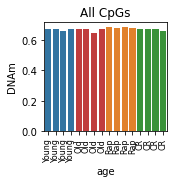

In [2]:
# Rejuvenation
cells=['SRR44738'+str(c) for c in range(55,55+16)]
path='data/meth/l/'
ages=4*['Young']+4*['Old']+4*['Rap']+4*['CR']
pl=pwg(cells,path,'age',chrs=19,labels=ages,
       color=4*['tab:blue']+4*['tab:red']+4*['tab:orange']+4*['tab:green'],w=2.2,figure='f4_a_wg')


In [3]:
l=pd.read_csv('results/ly.csv')
lp=prc(l)
colors=4*['tab:blue']+4*['tab:red']+4*['tab:orange']+4*['tab:green']

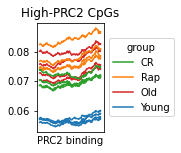

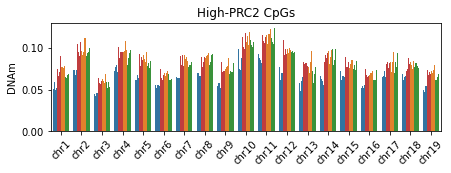

In [53]:
figure='f4_a_prc_line'
n=5;m=4.8;labels=ages;legend_title='group'
ax=lp.tail(round(10**n)).rolling(round(10**m)).mean().dropna().plot(figsize=(1.2,2),color=colors)
handles, _ = ax.get_legend_handles_labels()    
ax.legend([handles[12],handles[8],handles[4],handles[0]], [labels[12],labels[8],labels[4],labels[0]],title=legend_title,loc='center left', bbox_to_anchor=(1, 0.5))    
ax.set_xticks([])
ax.set_xlabel('PRC2 binding', fontsize=10)  
ax.set_title('High-PRC2 CpGs') 
ax.get_figure().savefig('figures/'+figure+'.png', dpi=600,bbox_inches='tight')
chs(l,cells,3,ages=ages,color=colors,figure='f4_a_chr')

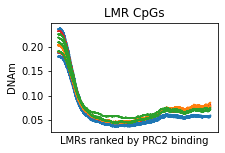

In [5]:
pprc(lp,colors,figure='')

/home/moqri/miniconda3/envs/meth/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


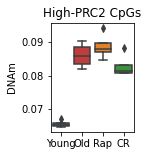

In [54]:
figure='f4_a_prc_box'
lm=l.tail(1000)[cells].mean()
lm.index=ages
fig, ax = plt.subplots(figsize=(1.5,2));
sns.boxplot(lm.index,lm.values,palette=['tab:blue','tab:red','tab:orange','tab:green'])
ax.set(ylabel='DNAm',title='High-PRC2 CpGs');
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
#add_stat_annotation(ax, x=lm.values, y=lm.index,
#box_pairs=[("Young", "Old"),("Old",'Rap'),("Old",'CR')],comparisons_correction=None,test='t-test_welch', loc='inside',verbose=3);
ax.get_figure().savefig('figures/'+figure+'.png', dpi=600,bbox_inches='tight')

In [ ]:
o=lm[4:8].values

In [ ]:
c=lm[12:15].values

In [ ]:
from scipy.stats import ttest_ind
ttest, pval = ttest_ind(c, o, alternative="less")
pval

In [ ]:
cells=['GSM279'+str(c) for c in range(4005,4015)]
path='data/meth/e/'
labels=['MEF']+['D'+str(d) for d in range(1,9)]+['iPS']
pl=pwg(cells,path,'sample',labels=labels,chrs=19,w=2)

In [ ]:
fr=pd.read_csv('results/fr.csv')
frp=prc(fr)
len(frp)
#colors=4*['tab:blue']+4*['tab:red']+4*['tab:orange']+4*['tab:green']

1629043

In [ ]:
n=5.2;m=4.8;legend_title='group'
ax=frp.tail(round(10**n)).rolling(round(10**m)).mean().dropna().plot(figsize=(2,2))#,color=colors)
handles, _ = ax.get_legend_handles_labels()    
ax.get_legend().remove()
#ax.legend([handles[12],handles[8],handles[4],handles[0]], [labels[12],labels[8],labels[4],labels[0]],title=legend_title,loc='center left', bbox_to_anchor=(1, 0.5))    
ax.set_xticks([])
ax.set_xlabel('PRC2 binding', fontsize=10)  
ax.set_title('High-PRC2 CpGs');

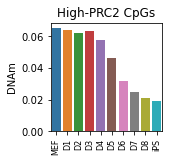

In [ ]:
pl=fr.tail(1000)[cells].mean()
fig, ax = plt.subplots(figsize=(2,2));
ax=sns.barplot(x=pl.index,y=pl.values);        
ax.set(ylabel='DNAm',title='High-PRC2 CpGs');
ax.set_xticklabels(labels);
plt.xticks(rotation=90,fontsize=8); 

n,t1,t2,

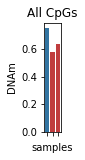

In [21]:
cohort='READ'
samples='samples'
cells=['n','t1','t2']
colors=['tab:blue']+2*['tab:red']
path='data/meth/c/r/' # READ
labels=cells#['MEF']+['D'+str(d) for d in range(1,9)]+['iPS']
pl=pwg(cells,path,samples,labels=3*[''],w=.3,color=colors,figure='f5_'+cohort+'_wg')

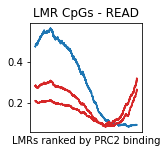

In [23]:
c=pd.read_csv('results/c_r.csv')
lc=prc(c)
pprc(lc,color=colors,w=2,ylabel='',figure='f5_'+cohort+'_prc',title='LMR CpGs - '+cohort)

n,t1,t2,

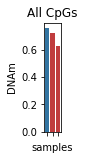

In [24]:
cohort='COAD'
cells=['n','t1','t2']
colors=['tab:blue']+2*['tab:red']
path='data/meth/c/c/' # COAD
labels=cells#['MEF']+['D'+str(d) for d in range(1,9)]+['iPS']
pl=pwg(cells,path,samples,labels=['','',''],w=.3,color=colors,figure='f5_'+cohort+'_wg')

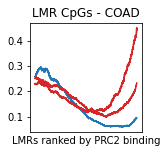

In [25]:
c=pd.read_csv('results/c_c.csv')
lc=prc(c)
pprc(lc,color=colors,w=2,ylabel='',figure='f5_'+cohort+'_prc',title='LMR CpGs - '+cohort)

n,t1,t2,t3,t4,

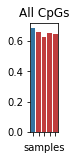

In [26]:
cohort='STAD'
cells=['n','t1','t2','t3','t4']
colors=['tab:blue']+4*['tab:red']
path='data/meth/c/s/' # STAD
labels=cells#['MEF']+['D'+str(d) for d in range(1,9)]+['iPS']
pl=pwg(cells,path,samples,labels=5*[''],w=.5,color=colors,ylabel='',figure='f5_'+cohort+'_wg')

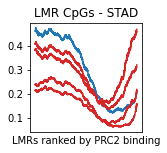

In [ ]:
c=pd.read_csv('results/c_s.csv')
lc=prc(c)
pprc(lc,color=colors,w=2,ylabel='',figure='f5_'+cohort+'_prc',title='LMR CpGs - '+cohort)

n,t1,t2,t3,t4,

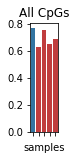

In [28]:
cohort='LUSC'
cells=['n','t1','t2','t3','t4']
colors=['tab:blue']+4*['tab:red']
path='data/meth/c/l/' #LUSC
labels=cells#['MEF']+['D'+str(d) for d in range(1,9)]+['iPS']
pl=pwg(cells,path,samples,labels=5*[''],w=.5,color=colors,ylabel='',figure='f5_'+cohort+'_wg')

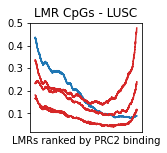

In [29]:
c=pd.read_csv('results/c_lusc.csv')
lc=prc(c)
pprc(lc,color=colors,w=2,ylabel='',figure='f5_'+cohort+'_prc',title='LMR CpGs - '+cohort)

n,t1,t2,t3,t4,t5,

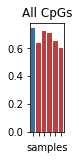

In [30]:
cohort='LUAD'
cells=['n','t1','t2','t3','t4','t5']
colors=['tab:blue']+5*['tab:red']
path='data/meth/c/luad/' #LUAD
labels=cells#['MEF']+['D'+str(d) for d in range(1,9)]+['iPS']
pl=pwg(cells,path,samples,labels=6*[''],w=.6,color=colors,ylabel='',figure='f5_'+cohort+'_wg')

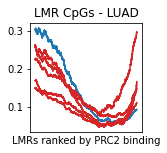

In [31]:
c=pd.read_csv('results/c_luad.csv')
lc=prc(c)
pprc(lc,color=colors,w=2,ylabel='',figure='f5_'+cohort+'_prc',title='LMR CpGs - '+cohort)

n,t1,t2,t3,t4,t5,

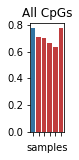

In [32]:
cohort='UCEC'
cells=['n','t1','t2','t3','t4','t5']
colors=['tab:blue']+5*['tab:red']
path='data/meth/c/u/' #UCEC
labels=cells#['MEF']+['D'+str(d) for d in range(1,9)]+['iPS']
pl=pwg(cells,path,samples,labels=6*[''],w=.6,color=colors,ylabel='',figure='f5_'+cohort+'_wg')

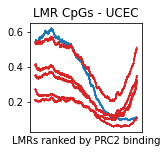

In [33]:
c=pd.read_csv('results/c_u.csv')
lc=prc(c)
pprc(lc,color=colors,w=2,ylabel='',figure='f5_'+cohort+'_prc',title='LMR CpGs - '+cohort)

n,t1,t2,t3,t4,t5,t6,

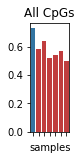

In [34]:
cohort='BLCA'
cells=['n','t1','t2','t3','t4','t5','t6']
colors=['tab:blue']+6*['tab:red']
path='data/meth/c/blca/' 
labels=cells#['MEF']+['D'+str(d) for d in range(1,9)]+['iPS']
pl=pwg(cells,path,samples,labels=7*[''],w=.7,color=colors,ylabel='',figure='f5_'+cohort+'_wg')

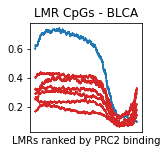

In [35]:
c=pd.read_csv('results/c_blca.csv')
lc=prc(c)
pprc(lc,color=colors,w=2,ylabel='',figure='f5_'+cohort+'_prc',title='LMR CpGs - '+cohort)

n,t1,t2,t3,t4,t5,

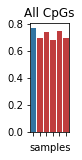

In [36]:
cohort='BRCA'
cells=['n','t1','t2','t3','t4','t5']
colors=['tab:blue']+6*['tab:red']
path='data/meth/c/brca/'
labels=cells#['MEF']+['D'+str(d) for d in range(1,9)]+['iPS']
pl=pwg(cells,path,samples,labels=6*[''],w=.7,color=colors,ylabel='',figure='f5_'+cohort+'_wg')

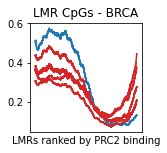

In [39]:
c=pd.read_csv('results/c_brca.csv')
lc=prc(c)
pprc(lc,color=colors,w=2,ylabel='',figure='f5_'+cohort+'_prc',title='LMR CpGs - '+cohort)

GSM2877239,GSM2877242,GSM2877183,GSM2877177,GSM2877184,GSM2877238,

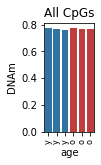

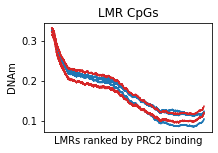

In [46]:
#brain
y=['GSM2877239','GSM2877242','GSM2877183']
o=['GSM2877177','GSM2877184','GSM2877238']
cells=y+o
path='data/meth/b/'
labels=3*['y']+3*['o']
colors=3*['tab:blue']+3*['tab:red']
pl=pwg(cells,path,'age',labels=labels,color=colors,figure='f5_b_wg')
f=pd.read_csv('results/b.csv')
fp=prc(f)
dg=pprc(fp,colors,figure='f5_b_lmr')

4,7,10,31,33,

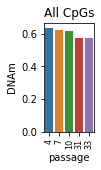

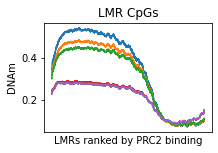

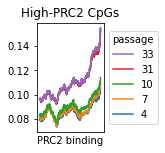

In [45]:
# Fib
cells=['4','7','10','31','33']
path='data/meth/f/'
pl=pwg(cells,path,'passage',figure='f5_c_wg')
f=pd.read_csv('results/f.csv')
fp=prc(f)
dg=pprc(fp,figure='f5_c_lmr')
dg=pprch(fp,6,5,legend_title='passage',figure='f5_c_prc')

In [42]:
p=pd.DataFrame(f.tail(1000)[cells].mean())

In [43]:
p['Passage']=[4,7,10,31,33]

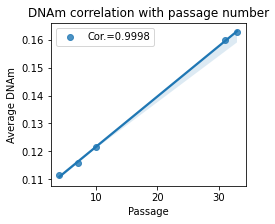

In [44]:
figure='fibroblast_corr'
p.columns=['Average DNAm','Passage']#,'Condition','Individual']
fig, ax = plt.subplots(figsize=(3.5,3))
ax=sns.regplot(data=p,x='Passage',y='Average DNAm',label='Cor.='+str(p.corr().values[0,1].round(4)))
ax.legend(loc="best")    
ax.set(title='DNAm correlation with passage number');
ax.get_figure().savefig('figures/'+figure+'.png', dpi=600,bbox_inches='tight')